<a href="https://colab.research.google.com/github/lanredipe/F23_A_Tag_Along_Codes/blob/main/20231107_IMDb's_List_of_900_Netflix_Movies_Titles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
from random import randint
import re

In [2]:
movieName = []
year = []
time = []
rating = []
metascore = []
votes = []
gross = []
director = []


In [3]:
headers = {"Accept-Language": "en-US, en; q=0.5"}

In [4]:
urlPage1 = 'https://www.imdb.com/list/ls057824079/?sort=list_order,asc&st_dt=&mode=detail&page=1'
urlPage2 = 'https://www.imdb.com/list/ls057824079/?sort=list_order,asc&st_dt=&mode=detail&page=2'
urlPage3 = 'https://www.imdb.com/list/ls057824079/?sort=list_order,asc&st_dt=&mode=detail&page=3'
urlPage4 = 'https://www.imdb.com/list/ls057824079/?sort=list_order,asc&st_dt=&mode=detail&page=4'
urlPage5 = 'https://www.imdb.com/list/ls057824079/?sort=list_order,asc&st_dt=&mode=detail&page=5'
urlPage6 = 'https://www.imdb.com/list/ls057824079/?sort=list_order,asc&st_dt=&mode=detail&page=6'
urlPage7 = 'https://www.imdb.com/list/ls057824079/?sort=list_order,asc&st_dt=&mode=detail&page=7'
urlPage8 = 'https://www.imdb.com/list/ls057824079/?sort=list_order,asc&st_dt=&mode=detail&page=8'
urlPage9 = 'https://www.imdb.com/list/ls057824079/?sort=list_order,asc&st_dt=&mode=detail&page=9'

In [5]:
urlPages = np.arange(1, 829, 100)

In [6]:
for urlPage in urlPages:
  urlPage = requests.get("https://www.imdb.com/list/ls057824079/?sort=list_order,asc&st_dt=&mode=detail&page='+str(urlPage)'", headers = headers)
  soup = BeautifulSoup(urlPage.content, 'html.parser')
  movieData = soup.findAll('div', attrs = {'class': 'lister-item mode-detail'})

  for movieStore in movieData:
    name = movieStore.h3.a.text
    movieName.append(name)

    yearReleased = int(re.search(r'\d{4}', movieStore.h3.find('span', class_ = 'lister-item-year text-muted unbold').text.replace('(','').replace(')','')).group())
    year.append(yearReleased)

    playTime = movieStore.p.find('span', class_ = 'runtime').text.replace(' min','')
    time.append(int(playTime))

    movieRating = movieStore.find('span', class_ = 'ipl-rating-star__rating').text
    rating.append(float(movieRating))

    movieMeta = movieStore.find('span', class_ = 'metascore').text.replace(' ','') if movieStore.find('span', class_ = 'metascore') else "0"
    metascore.append(int(movieMeta))

    movieVoteGross = movieStore.findAll('span', attrs = {'name': 'nv'})
    movieVote = movieVoteGross[0].text.replace(',', '')
    votes.append(int(movieVote))

    movieGross = movieVoteGross[1].text.replace('$', '').replace('M', '') if len(movieVoteGross)>1 else "1"
    gross.append(float(movieGross))

    movieDirector = movieStore.findAll('p', attrs = {'class': 'text-muted text-small'})[1].find('a').text
    director.append(movieDirector)


In [7]:
movieDF = pd.DataFrame({'Name of Movie': movieName, 'Year of Release': year, 'Watch Time': time, 'Movie Rating': rating, 'Metascore': metascore, 'Votes': votes, 'Gross Earning': gross, 'Director': director})

In [8]:
movieDF

,Name of Movie,Year of Release,Watch Time,Movie Rating,Metascore,Votes,Gross Earning,Director
0,Dead Man,1995,121,7.5,62,101539,1.04,Jim Jarmusch
1,All Good Things,2010,101,6.3,57,58700,0.58,Andrew Jarecki
2,Brick,2005,110,7.2,72,109089,2.06,Rian Johnson
3,Breakfast at Tiffany's,1961,115,7.6,76,188564,1.00,Blake Edwards
4,Billy Elliot,2000,110,7.7,74,140332,22.00,Stephen Daldry
...,...,...,...,...,...,...,...,...
895,Small Soldiers,1998,110,6.2,0,104094,54.68,Joe Dante
896,Stuart Little,1999,84,6.0,61,145233,140.04,Rob Minkoff
897,She's All That,1999,95,5.9,51,101159,63.37,Robert Iscove
898,Trainspotting,1996,93,8.1,83,712757,16.50,Danny Boyle


In [9]:
movieDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name of Movie    900 non-null    object 
 1   Year of Release  900 non-null    int64  
 2   Watch Time       900 non-null    int64  
 3   Movie Rating     900 non-null    float64
 4   Metascore        900 non-null    int64  
 5   Votes            900 non-null    int64  
 6   Gross Earning    900 non-null    float64
 7   Director         900 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 56.4+ KB


In [10]:
movieDF.describe()

,Year of Release,Watch Time,Movie Rating,Metascore,Votes,Gross Earning
count,900.000000,900.000000,900.000000,900.000000,9.000000e+02,900.000000
mean,2000.790000,109.360000,7.072000,61.390000,1.988432e+05,45.041500
std,9.604603,17.361028,0.662498,21.414187,2.364136e+05,57.712722
min,1961.000000,69.000000,5.500000,0.000000,1.293600e+04,0.010000
25%,1996.000000,98.000000,6.575000,52.000000,6.854150e+04,4.995000
50%,2001.500000,107.500000,7.200000,65.000000,1.154885e+05,23.445000
75%,2009.000000,117.000000,7.500000,76.000000,1.961812e+05,59.145000
max,2011.000000,178.000000,8.400000,91.000000,1.294065e+06,370.780000


In [11]:
movieDF.to_csv('movieData.csv', index=False)


In [12]:
import os

# Getting the current working directory
current_directory = os.getcwd()

# Listingthe files in the current directory
files = os.listdir(current_directory)

# Finding the "movieData.csv" file in the list
if "movieData.csv" in files:
    print(f"'movieData.csv' is in the current directory: {current_directory}")
else:
    print("The file 'movieData.csv' is not in the current directory.")

'movieData.csv' is in the current directory: /content


In [13]:
movieDF.isna().sum()

Name of Movie      0
Year of Release    0
Watch Time         0
Movie Rating       0
Metascore          0
Votes              0
Gross Earning      0
Director           0
dtype: int64

In [14]:
movieDF.corr()

<ipython-input-14-2124b05724b0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  movieDF.corr()


,Year of Release,Watch Time,Movie Rating,Metascore,Votes,Gross Earning
Year of Release,1.000000,-0.074834,-0.281449,-0.211092,0.076000,-0.046643
Watch Time,-0.074834,1.000000,0.376110,0.148130,0.157202,0.118450
Movie Rating,-0.281449,0.376110,1.000000,0.594514,0.452536,-0.047874
Metascore,-0.211092,0.148130,0.594514,1.000000,0.249468,-0.040119
Votes,0.076000,0.157202,0.452536,0.249468,1.000000,0.321682
Gross Earning,-0.046643,0.118450,-0.047874,-0.040119,0.321682,1.000000


In [18]:
movieDF.columns.to_list()

['Name of Movie',
 'Year of Release',
 'Watch Time',
 'Movie Rating',
 'Metascore',
 'Votes',
 'Gross Earning',
 'Director']

In [ ]:
## Visualizations and Insights

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

**Creating a histogram and a line chart of the "Year of Release" to visualize the distribution of movie releases over the years**

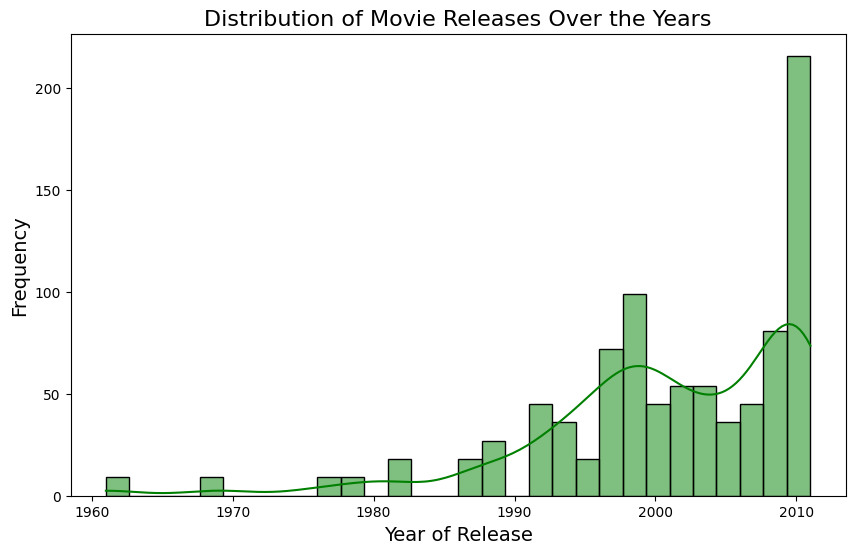

In [42]:
# Year of Release
releaseYears = movieDF['Year of Release']

plt.figure(figsize=(10, 6))

# Creating the histogram
sns.histplot(data=releaseYears, bins=30, kde=True, color='green')

# Customizing the plot
plt.title('Distribution of Movie Releases Over the Years', fontsize=16)
plt.xlabel('Year of Release', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Showing the plot
plt.show()


In [23]:
movieDF['Year of Release'].nunique()

29

Line Chart For Better Visualization

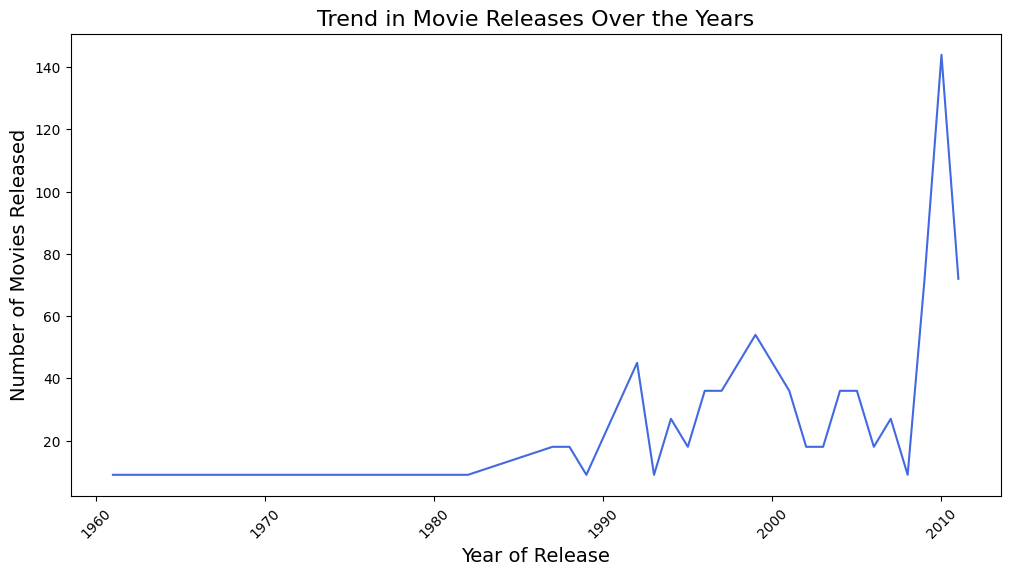

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extracting the release years
releaseYears = movieDF['Year of Release']

# Counting the number of movies released each year
releaseCounts = releaseYears.value_counts().sort_index()

plt.figure(figsize=(12, 6))

# Creating a line plot
sns.lineplot(x=releaseCounts.index, y=releaseCounts.values, color='royalblue')

plt.title('Trend in Movie Releases Over the Years', fontsize=16)
plt.xlabel('Year of Release', fontsize=14)
plt.ylabel('Number of Movies Released', fontsize=14)

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()


**Creating a bar chart to visualize the distribution of movie runtimes (Watch Time)**

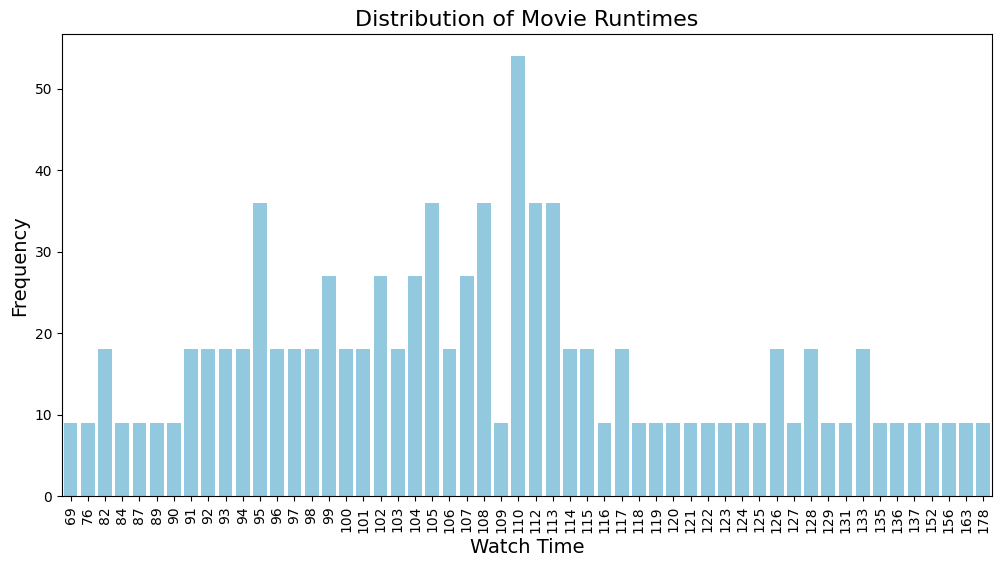

In [33]:
# Extracting the Watch Time column from the DataFrame
watchTime = movieDF['Watch Time']

plt.figure(figsize=(12, 6))

# Creating the bar chart
sns.barplot(x=watchTime.value_counts().index, y=watchTime.value_counts().values, color='skyblue')

# Customizing the plot
plt.title('Distribution of Movie Runtimes', fontsize=16)
plt.xlabel('Watch Time', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Rotating x-axis labels for better readability
plt.xticks(rotation=90)

# Showing the plot
plt.show()


**Creating a scatter plot and correlation heatmap to visualize the relationship between "Movie Rating" and "Metascore"**


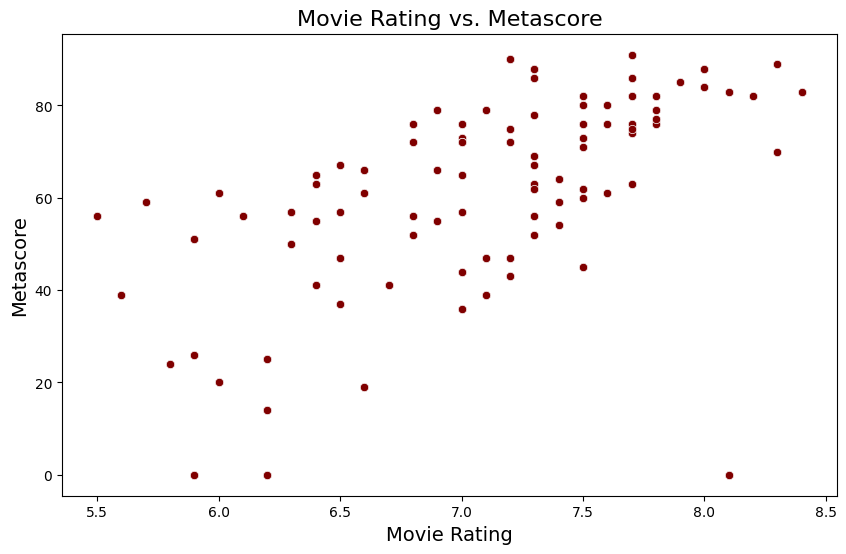

In [41]:
movieRating = movieDF['Movie Rating']
metascore = movieDF['Metascore']

plt.figure(figsize=(10, 6))

# Creating the scatter plot
sns.scatterplot(x=movieRating, y=metascore, color='maroon')

# Customizing the plot
plt.title('Movie Rating vs. Metascore', fontsize=16)
plt.xlabel('Movie Rating', fontsize=14)
plt.ylabel('Metascore', fontsize=14)

# Showing the plot
plt.show()


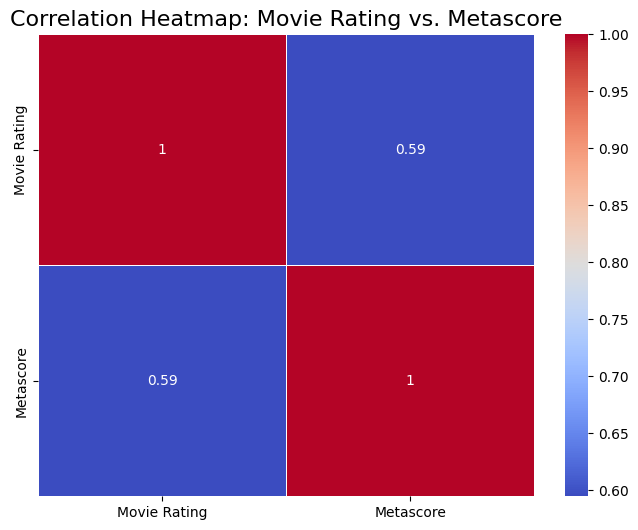

In [36]:
# Creating a DataFrame with the two columns
correlation_df = pd.DataFrame({'Movie Rating': movieRating, 'Metascore': metascore})

# Creating the correlation matrix
correlation_matrix = correlation_df.corr()

# Setting up the plot
plt.figure(figsize=(8, 6))

# Creating the heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Heatmap: Movie Rating vs. Metascore', fontsize=16)
plt.show()


In [38]:
# Calculate=ing the Pearson correlation coefficient
correlation = np.corrcoef(movieRating, metascore)[0, 1]

print(f"Pearson Correlation Coefficient: {correlation:.2f}")

Pearson Correlation Coefficient: 0.59


*The Pearson correlation coefficient of 0.59 indicates a moderate positive correlation between "Movie Rating" and "Metascore" in the dataset*
It's not a perfect correlation, but there is a noticeable relationship between the two variables.

In practical terms, this means that movies with higher ratings tend to have higher Metascores, but there is still variability, and not all movies with high ratings have high Metascores.

Overall, the positive correlation suggests that there is some agreement between the two rating metrics, but it's not a one-to-one relationship, and other factors may influence the ratings and scores of movies.



**Visualizing the distribution of vote**

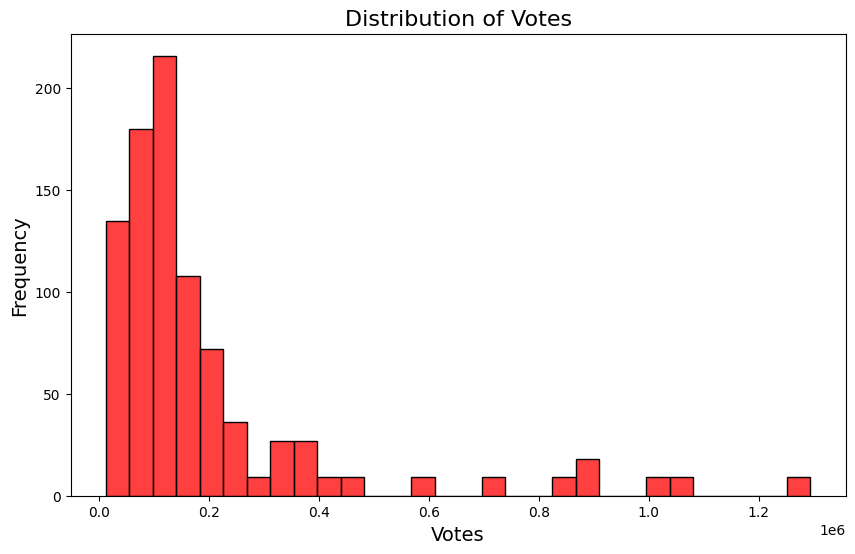

In [40]:
# Extracting the "Votes" column from the DataFrame
votes = movieDF['Votes']

plt.figure(figsize=(10, 6))

# Creating a histogram
sns.histplot(votes, color='red', bins=30)

# Customizing the plot
plt.title('Distribution of Votes', fontsize=16)
plt.xlabel('Votes', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.show()


**Visualizing the relationship between "Gross Earnings" and "Year of Release**

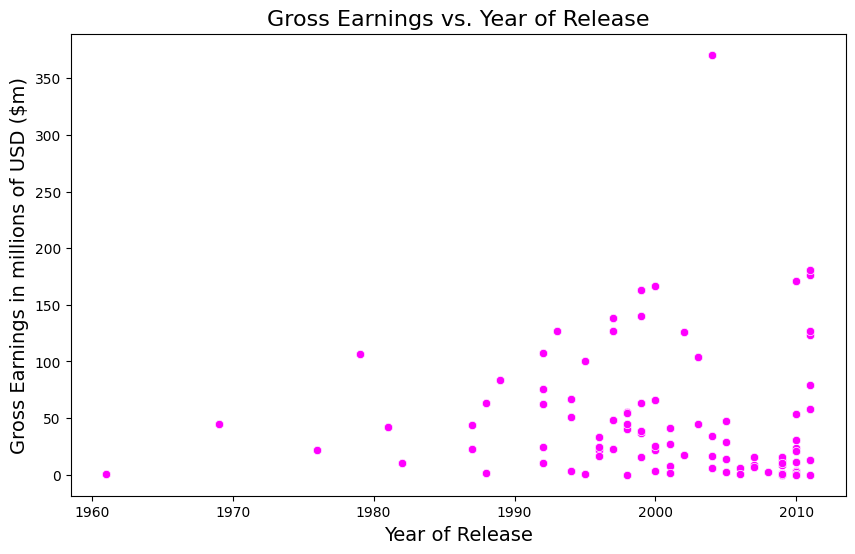

In [46]:
# Extracting the "Gross Earnings" and "Year of Release" columns from the DataFrame
grossEarnings = movieDF['Gross Earning']
yearOfRelease = movieDF['Year of Release']

plt.figure(figsize=(10, 6))

# Create the scatter plot
sns.scatterplot(x=yearOfRelease, y=grossEarnings, color='Magenta')

# Customize the plot
plt.title('Gross Earnings vs. Year of Release', fontsize=16)
plt.xlabel('Year of Release', fontsize=14)
plt.ylabel('Gross Earnings in millions of USD ($m)', fontsize=14)

# Show the plot
plt.show()

**Creating visualizations to gain insights into Directors work**

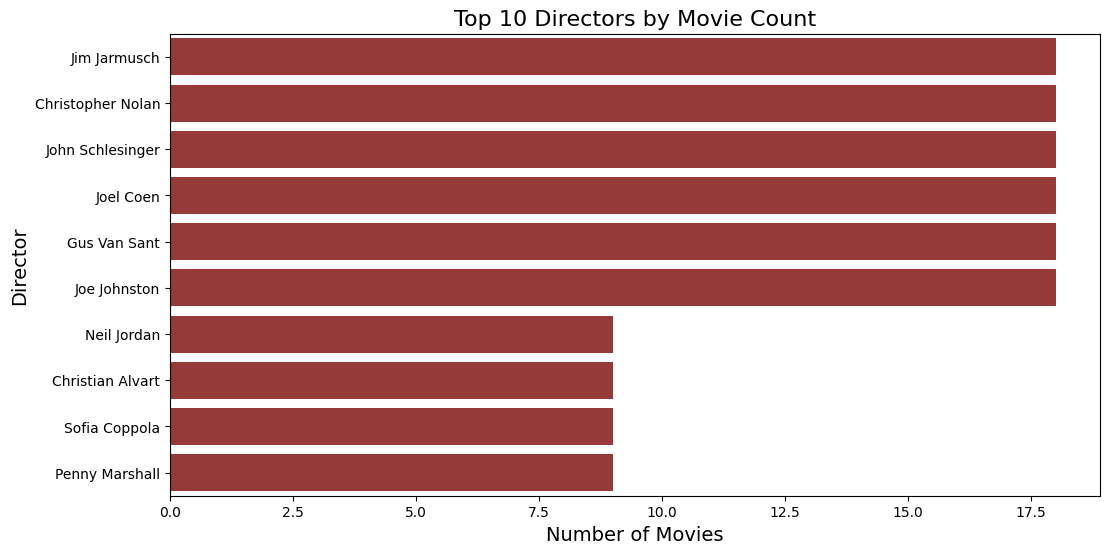

In [47]:
# Bar chart to visualize the number of movies directed by each director, i.e. Director Counts

# Extracting the "Director" column from the DataFrame
directors = movieDF['Director']

plt.figure(figsize=(12, 6))

# Creating a bar chart showing director counts
sns.countplot(y=directors, order=directors.value_counts().index[:10], color='brown')

# Customizing the plot
plt.title('Top 10 Directors by Movie Count', fontsize=16)
plt.xlabel('Number of Movies', fontsize=14)
plt.ylabel('Director', fontsize=14)

# Show the plot
plt.show()

In [48]:
directors.nunique()

94

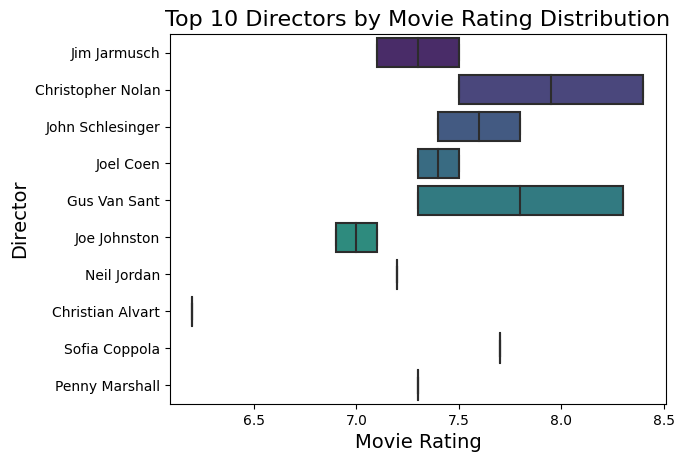

In [50]:
# Creating a box plot for director ratings
ratings = movieDF['Movie Rating']
sns.boxplot(x=ratings, y=directors, order=directors.value_counts().index[:10], palette='viridis')

# Customizing the plot
plt.title('Top 10 Directors by Movie Rating Distribution', fontsize=16)
plt.xlabel('Movie Rating', fontsize=14)
plt.ylabel('Director', fontsize=14)

# Showing the plot
plt.show()

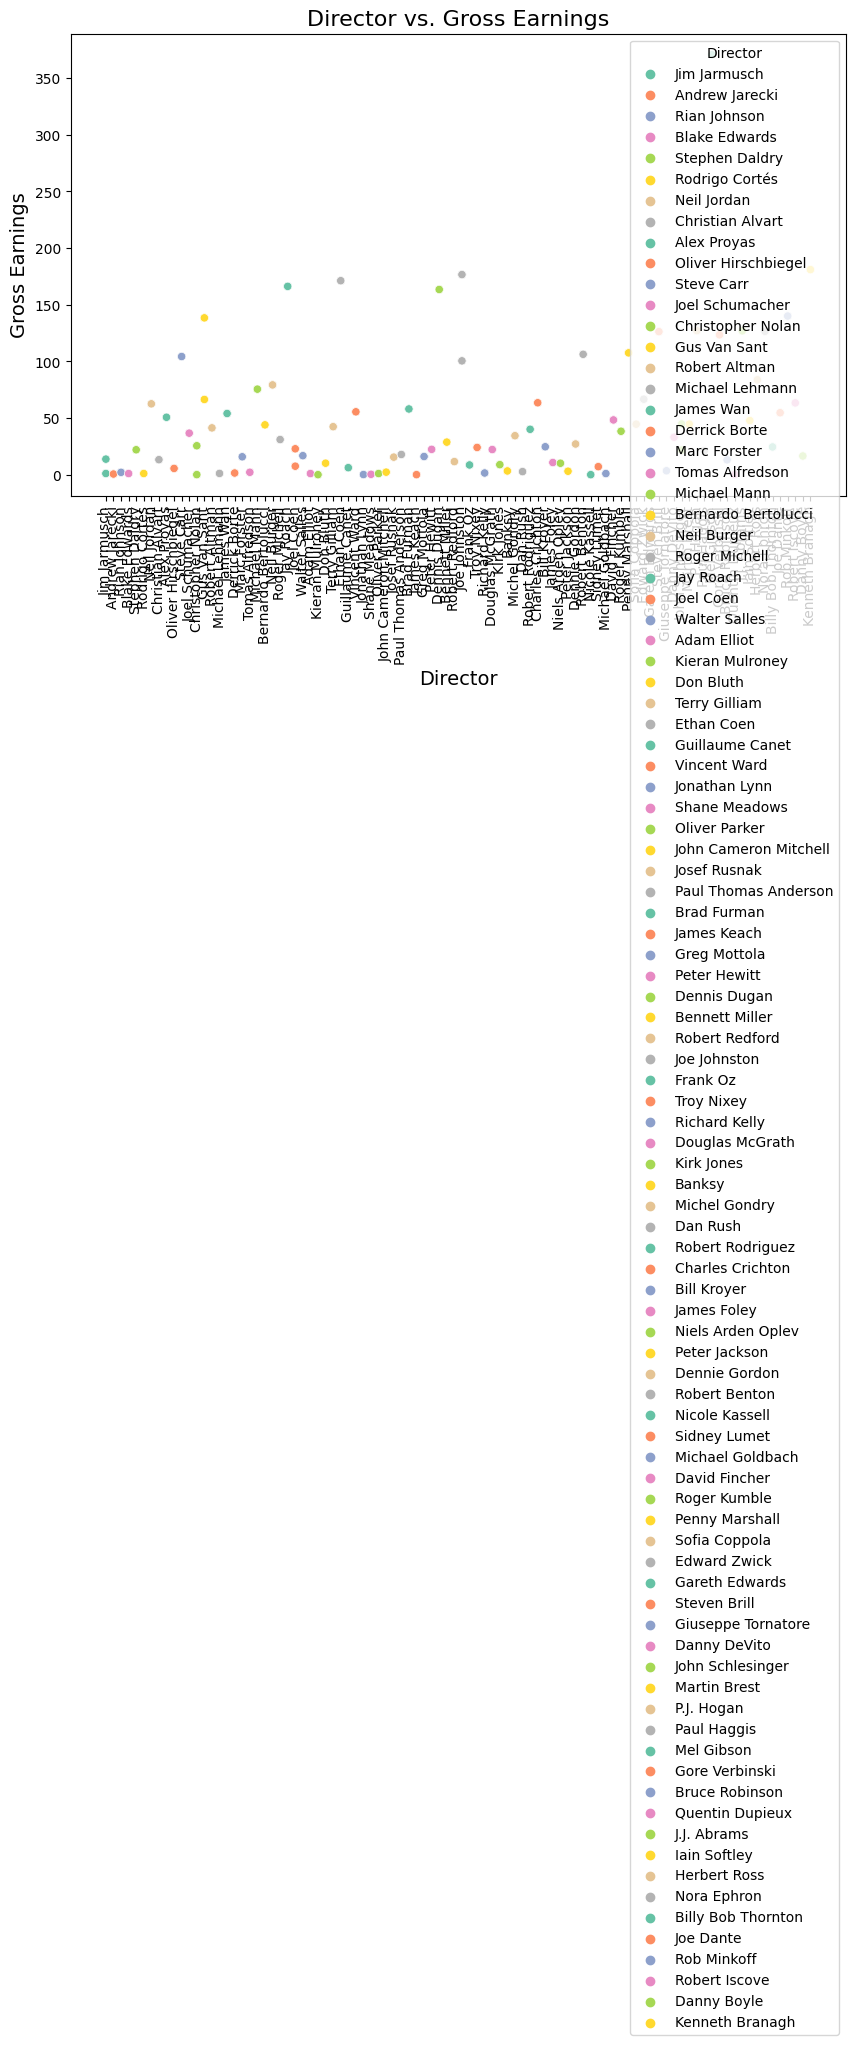

In [53]:
# Creating a scatter plot to visualize the relationship between directors and the gross earnings of their movies

earnings = movieDF['Gross Earning']

plt.figure(figsize=(10, 6))

# Creating the scatter plot for director vs. gross earnings
sns.scatterplot(x=directors, y=earnings, color='red', hue=directors, palette='Set2')

# Customizing the plot
plt.title('Director vs. Gross Earnings', fontsize=16)
plt.xlabel('Director', fontsize=14)
plt.ylabel('Gross Earnings', fontsize=14)
plt.xticks(rotation=90)

# Showing the plot
plt.show()

**Top 10 Earning Directors**

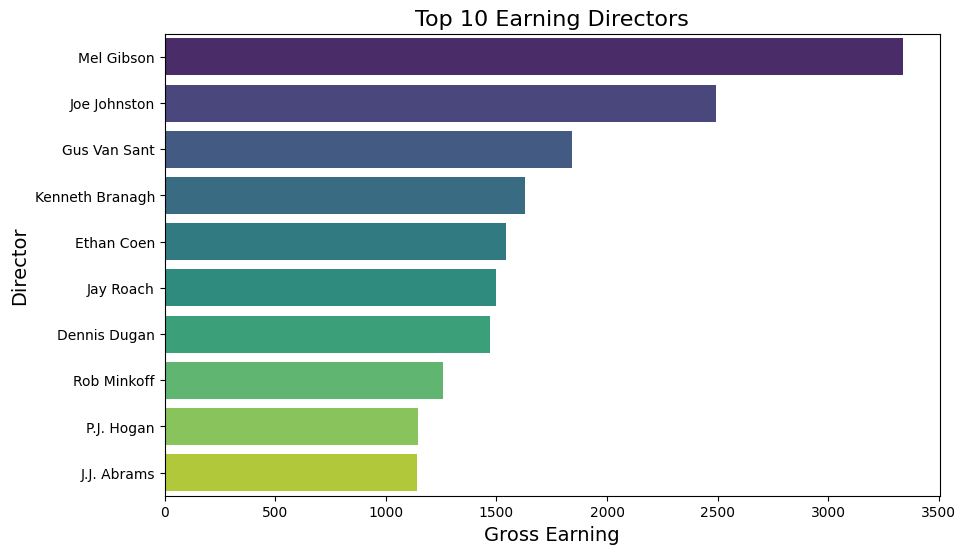

In [54]:
# Bar chart
# Grouping the data by director and sum the gross earnings for each director
directorEarnings = movieDF.groupby('Director')['Gross Earning'].sum().reset_index()

# Sorting the data by gross earnings in descending order and selecting the top 10 earning directors
topEarningDirectors = directorEarnings.sort_values(by='Gross Earning', ascending=False).head(10)

plt.figure(figsize=(10, 6))

# Creating a horizontal bar chart
sns.barplot(x='Gross Earning', y='Director', data=topEarningDirectors, palette='viridis')

# Customizing the plot
plt.title('Top 10 Earning Directors', fontsize=16)
plt.xlabel('Gross Earning', fontsize=14)
plt.ylabel('Director', fontsize=14)

# Showing the plot
plt.show()


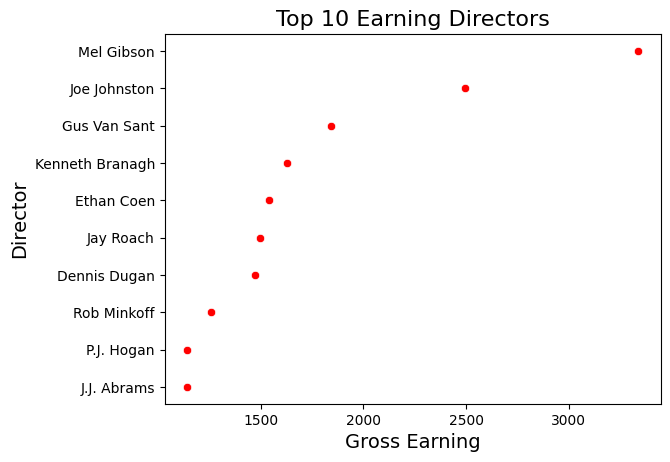

In [55]:
# Scatter plot for director vs. gross earnings
sns.scatterplot(x='Gross Earning', y='Director', data=topEarningDirectors, color='red')

# Customizing the plot
plt.title('Top 10 Earning Directors', fontsize=16)
plt.xlabel('Gross Earning', fontsize=14)
plt.ylabel('Director', fontsize=14)

# Showing the plot
plt.show()

**Correlation Heatmap of all numerical features**

<ipython-input-57-61ffcac543e7>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = movieDF.corr()


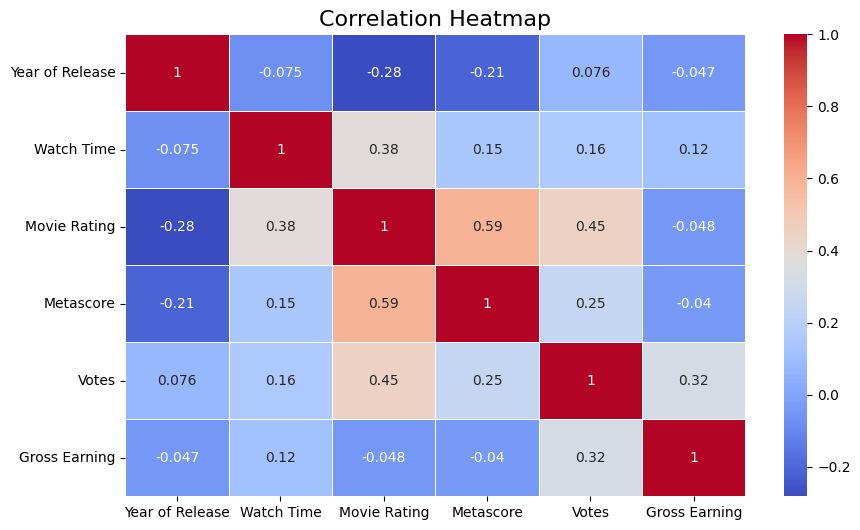

In [57]:
# Creating the correlation heatmap for the different numerical features in the dataset

correlation_matrix = movieDF.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)

# Customizing the plot
plt.title('Correlation Heatmap', fontsize=16)

# Showing the plot
plt.show()

In [59]:
uniqueYears = sorted(movieDF['Year of Release'].unique())
uniqueYears


[1961,
 1969,
 1976,
 1979,
 1981,
 1982,
 1987,
 1988,
 1989,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011]

**Visualization of the correlation between/among rating, metascore, watch time versus gross earning**

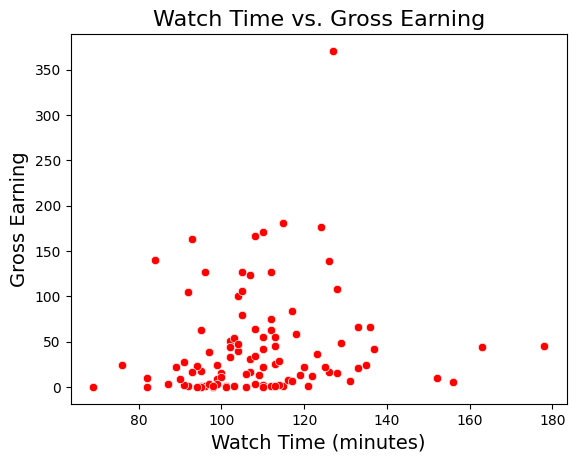

In [62]:
# Creating a scatter plot for Watch Time vs. Gross Earning
sns.scatterplot(x='Watch Time', y='Gross Earning', data=movieDF, color='red')

# Customizing the plot
plt.title('Watch Time vs. Gross Earning', fontsize=16)
plt.xlabel('Watch Time (minutes)', fontsize=14)
plt.ylabel('Gross Earning', fontsize=14)

# Showing the plot
plt.show()

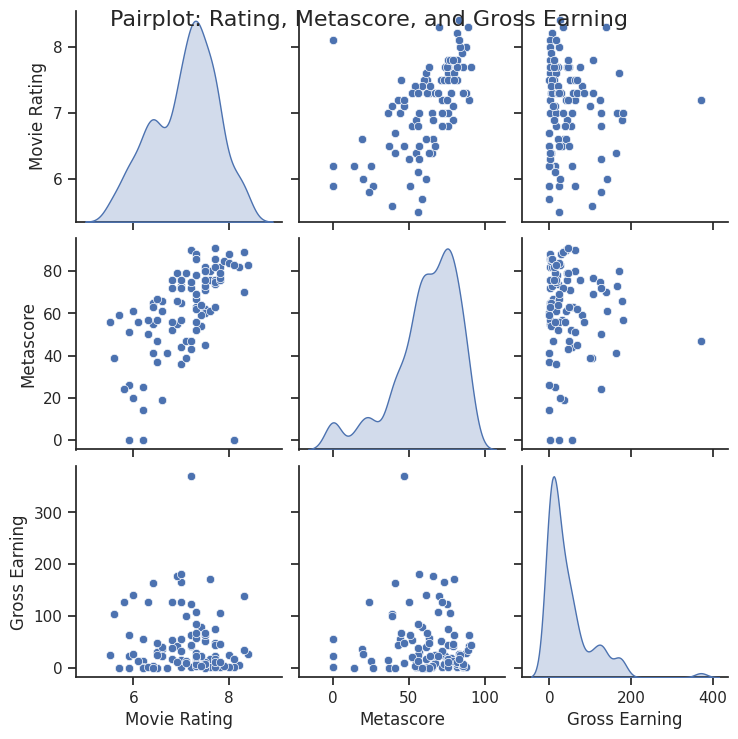

In [63]:
# visualizing the correlation between "Movie Rating" and "Metascore" versus "Gross Earning"

# Creating a pairplot
sns.set(style="ticks")
sns.pairplot(movieDF, vars=["Movie Rating", "Metascore", "Gross Earning"], diag_kind='kde', kind='scatter')

# Customizing the plot
plt.suptitle('Pairplot: Rating, Metascore, and Gross Earning', fontsize=16)
plt.show()